In [37]:
# Import stuffs
from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
df = pd.read_csv("creditcard.csv")
df = df.dropna(how="all")
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [39]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(frauds.shape)
print(non_frauds.shape)

(492, 31)
(284315, 31)


In [40]:
# conclusion: 492/284807 are frauds the rest are non_faruds

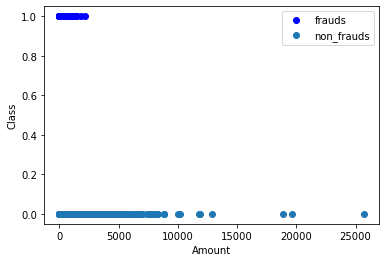

In [41]:
plt.plot(frauds.Amount, frauds.Class, 'bo', label='frauds')
plt.plot(non_frauds.Amount, non_frauds.Class, 'o', label='non_frauds')
plt.xlabel("Amount")
plt.ylabel("Class")
plt.legend()

In [42]:
# logistic regression

X = df.drop('Class', axis=1)
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [43]:
log_regression = LogisticRegression()
log_regression.fit(X_train, y_train)

y_pred = log_regression.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[56826,    40],
       [   30,    66]], dtype=int64)

Text(33.0, 0.5, 'Predicted class')

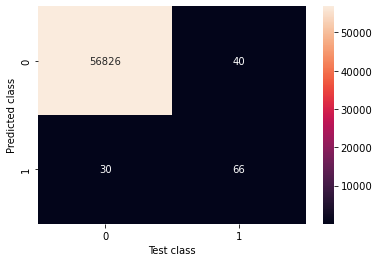

In [45]:
sns.heatmap(conf_matrix, annot=True, fmt = ".0f")
plt.xlabel("Test class")
plt.ylabel("Predicted class")

In [ ]:
#